## **New York City Taxi Fare Prediction - by David Guzzi**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format)

In [46]:
#Lectura y visualización de información
df = pd.read_csv('train_s.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,17358777,2009-12-16 19:56:08.0000002,6.10,2009-12-16 19:56:08 UTC,-73.96,40.77,-73.97,40.76,1
1,53320139,2012-05-03 09:31:00.000000164,6.10,2012-05-03 09:31:00 UTC,-74.00,40.74,-73.99,40.74,1
2,42864741,2013-07-25 19:08:33.0000003,11.50,2013-07-25 19:08:33 UTC,-73.97,40.74,-73.99,40.74,1
3,26375625,2011-12-02 16:30:00.00000089,3.30,2011-12-02 16:30:00 UTC,-73.97,40.77,-73.97,40.77,1
4,41418930,2014-01-08 03:43:57.0000001,19.50,2014-01-08 03:43:57 UTC,-73.98,40.75,-73.89,40.77,1


In [47]:
#Eliminación de primera columna
df = df.iloc[:,1:]
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-12-16 19:56:08.0000002,6.10,2009-12-16 19:56:08 UTC,-73.96,40.77,-73.97,40.76,1
1,2012-05-03 09:31:00.000000164,6.10,2012-05-03 09:31:00 UTC,-74.00,40.74,-73.99,40.74,1
2,2013-07-25 19:08:33.0000003,11.50,2013-07-25 19:08:33 UTC,-73.97,40.74,-73.99,40.74,1
3,2011-12-02 16:30:00.00000089,3.30,2011-12-02 16:30:00 UTC,-73.97,40.77,-73.97,40.77,1
4,2014-01-08 03:43:57.0000001,19.50,2014-01-08 03:43:57 UTC,-73.98,40.75,-73.89,40.77,1


In [48]:
#Detalles generales de la información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662716 entries, 0 to 1662715
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1662716 non-null  object 
 1   fare_amount        1662716 non-null  float64
 2   pickup_datetime    1662716 non-null  object 
 3   pickup_longitude   1662716 non-null  float64
 4   pickup_latitude    1662716 non-null  float64
 5   dropoff_longitude  1662706 non-null  float64
 6   dropoff_latitude   1662706 non-null  float64
 7   passenger_count    1662716 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 101.5+ MB


In [49]:
#Corroboramos que sean registros únicos
df['key'].nunique()

1662716

In [50]:
#Adecuamos formato a columna 'pickup_datetime' y corroboramos
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662716 entries, 0 to 1662715
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   key                1662716 non-null  object             
 1   fare_amount        1662716 non-null  float64            
 2   pickup_datetime    1662716 non-null  datetime64[ns, UTC]
 3   pickup_longitude   1662716 non-null  float64            
 4   pickup_latitude    1662716 non-null  float64            
 5   dropoff_longitude  1662706 non-null  float64            
 6   dropoff_latitude   1662706 non-null  float64            
 7   passenger_count    1662716 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 101.5+ MB


In [51]:
#Exploraremos las posibles relaciones del Target con los Features de forma individual. Primero: 'passenger_count'
#Exploraremos la variable o target a predecir: 'fare_amount'
df[['fare_amount']].describe()

,fare_amount
count,1662716.00
mean,11.33
std,9.82
min,-52.00
25%,6.00
50%,8.50
75%,12.50
max,850.00


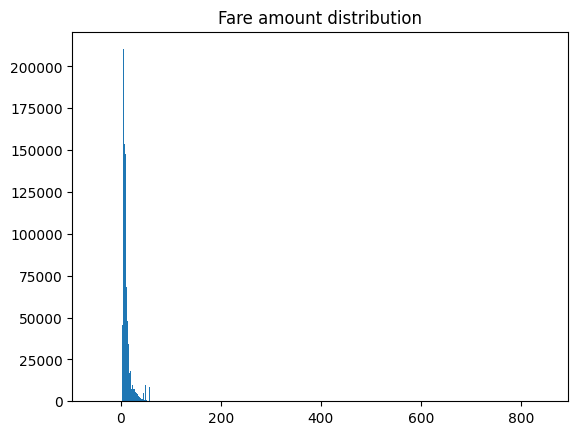

In [52]:
fig, ax = plt.subplots()
ax.hist(df['fare_amount'], bins=1000)
ax.set_title('Fare amount distribution')
plt.show()

El histograma de 'fare_amount' revela que la misma posee tanto valores ilógicos (valores negativos) como valores positivos extremos.

Para una mejor visualización, se presentan 3 nuevas visualizaciones 

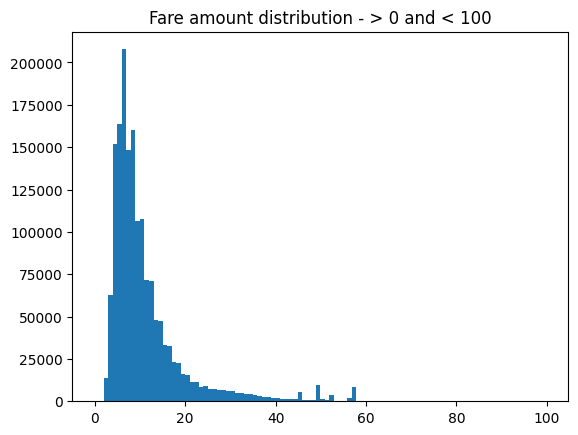

In [53]:
fig, ax = plt.subplots()
ax.hist(df[(df['fare_amount'] < 100) & (df['fare_amount'] > 0)]['fare_amount'], bins=100)
ax.set_title('Fare amount distribution - > 0 and < 100')
plt.show()

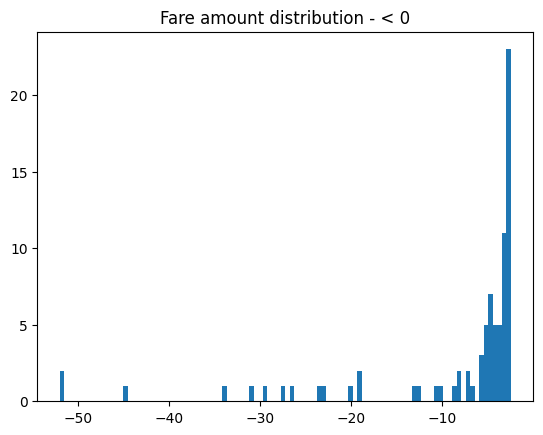

In [54]:
fig, ax = plt.subplots()
ax.hist(df[df['fare_amount'] < 0]['fare_amount'], bins=100)
ax.set_title('Fare amount distribution - < 0')
plt.show()

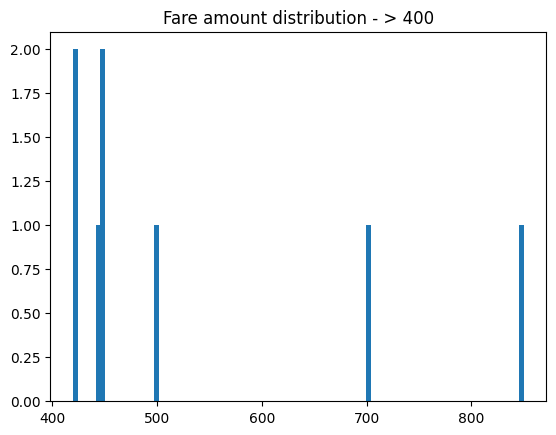

In [58]:
fig, ax = plt.subplots()
ax.hist(df[df['fare_amount'] > 400]['fare_amount'], bins=100)
ax.set_title('Fare amount distribution - > 400')
plt.show()

In [59]:
#En primer ligar, se eliminan aquellos registros con valores negativos en target 'fare_amount' por considerarse ilógicos
df = df[df['fare_amount'] > 0]

In [ ]:
#Se analizan si los datos extremos positivos constituyen outliers y se determinan decisiones a tomar


In [57]:
# df[(df['pickup_longitude'] == df['dropoff_longitude']) & (df['pickup_latitude'] == df['dropoff_latitude'])]

In [61]:
def haversine(lon1, lat1, lon2, lat2):
    # Convertir grados a radianes
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Diferencias de coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Fórmula de Haversine
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radio de la Tierra en kilómetros
    return c * r

In [63]:
df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

0   -73.96
1   -74.00
2   -73.97
3   -73.97
4   -73.98
Name: pickup_longitude, dtype: float64

In [65]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distancia,distance
1662711,2010-07-12 15:13:00.00000069,4.90,2010-07-12 15:13:00+00:00,-73.96,40.77,-73.96,40.78,1,1.10,1.10
1662712,2011-02-13 19:45:44.0000007,3.70,2011-02-13 19:45:44+00:00,-73.99,40.75,-73.99,40.74,1,0.72,0.72
1662713,2012-04-29 19:43:00.000000186,7.70,2012-04-29 19:43:00+00:00,-73.98,40.77,-73.96,40.77,1,2.25,2.25
1662714,2014-03-31 19:44:31.0000001,10.50,2014-03-31 19:44:31+00:00,-73.95,40.78,-73.98,40.77,1,2.74,2.74
1662715,2010-07-04 17:43:15.0000002,7.30,2010-07-04 17:43:15+00:00,-73.98,40.74,-74.01,40.74,1,2.48,2.48
